# Clustering on Credit Card Dataset with PyCaret

Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups.

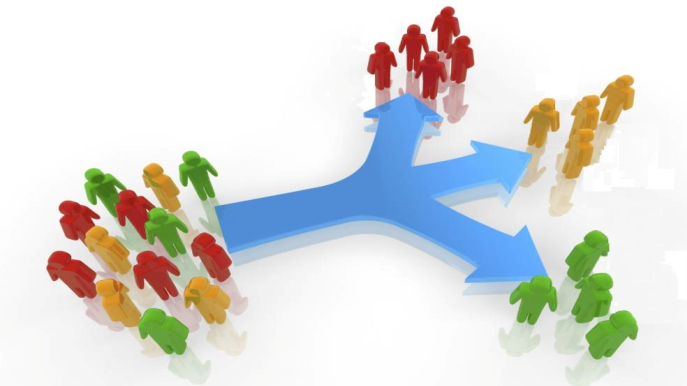

Istruzioni per l 'uso:

Andare sul proprio google drive e inserire in una nuova cartella chiamata "DM" questo [DATASET](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download)

# Problem Statement
This case requires developing a customer segmentation to define a marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset:

- CUSTID: Identification of Credit Cardholder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from the account
- ONEOFFPURCHASES: Maximum purchase amount did in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASH ADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently is the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX: Number of purchase transactions made
- CREDIT LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by the user
- MINIMUM_PAYMENTS: Minimum amount of payments made by the user
- PRCFULLPAYMENT: Percent of full payment paid by the user
- TENURE: Tenure of credit card service for user

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
data= pd.read_csv(r'CC GENERAL.csv.xls')
data

In [ ]:
data.describe().T

## Commento:
In questa prima parte del progetto su Kaggle viene analizzato il dataset utilizzato, denominato CC GENERAL.csv. Il dataset contiene informazioni relative a circa 9.000 titolari attivi di carte di credito, registrate negli ultimi sei mesi. Sono presenti 18 variabili che includono dati identificativi, indicatori finanziari, comportamenti di acquisto, frequenze e utilizzo delle transazioni, oltre all’anzianità del cliente.

In [ ]:
data.isnull().sum().sort_values(ascending=False)

## Commento:
In questa sezione vengono analizzati i dati mancanti del dataset. Si osserva l'assenza di 313 valori nella variabile MINIMUM_PAYMENTS e di 1 valore nella variabile CREDIT_LIMIT. Questi valori mancanti verranno gestiti e imputati nelle fasi successive dell’analisi.

In [ ]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns

In [ ]:
df_v = pd.DataFrame(data['TENURE'].value_counts())
df_v.columns = ['count']
plot = df_v.plot.pie(y='count', figsize=(8, 8))

## Commento:
In questa sezione viene visualizzato graficamente il valore della variabile TENURE, che rappresenta l’anzianità del cliente in mesi. In particolare, si evidenziano i clienti che possiedono una carta di credito attiva da 9 a 12 mesi.

In [ ]:
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = data,palette='Pastel1');

## Commento:
In questa sezione viene analizzata la variabile CREDIT_LIMIT in relazione alla TENURE tramite un boxplot, che consente di visualizzare la distribuzione statistica del limite di credito in funzione dell’anzianità del cliente. Il grafico permette di osservare eventuali variazioni, tendenze o anomalie nei limiti di credito concessi in base al numero di mesi di utilizzo della carta.

In [ ]:
sns.scatterplot(x='CREDIT_LIMIT', y='PRC_FULL_PAYMENT', data=data,color='purple');

## Commento:
In questa sezione viene utilizzato uno scatter plot per analizzare la relazione tra la percentuale di volte in cui il cliente ha pagato l’intero saldo dovuto (PRC_FULL_PAYMENT) e il CREDIT_LIMIT. Dal grafico si osserva che molti clienti si concentrano agli estremi della distribuzione, con valori pari a 0 o 1, indicando che tendono a pagare sempre o mai l’intero saldo.

In [ ]:
data[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4));

## Commento:
Questo blocco fornisce un’overview visiva molto utile delle variabili numeriche presenti nel dataset, permettendo di ottenere una panoramica generale della loro distribuzione, variabilità e possibili anomalie.



In [ ]:
data[num_col].corr()

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(data[num_col].corr(),annot = True);

## Commento:
In questa fase viene calcolata la matrice di correlazione tra le variabili numeriche del dataset, con l’obiettivo di individuare eventuali relazioni lineari tra di esse. Questo passaggio è fondamentale per comprendere le connessioni tra le diverse metriche e supportare eventuali scelte di feature selection o analisi successive.

## Filling in missing data with KnnImputer

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(data[num_col]),columns=data[num_col].columns)
imp_data.isna().sum()

## Commento:

In questo blocco viene utilizzato il KNNImputer di scikit-learn per imputare i valori mancanti nelle variabili numeriche del dataset (num_col). L’imputazione si basa sui valori di osservazioni simili, individuate tramite la distanza tra le righe.

Il metodo KNNImputer() sostituisce i valori nulli calcolando la media dei k vicini più prossimi (con k=5 come valore predefinito), rendendolo particolarmente utile per preservare la struttura dei dati durante la fase di pulizia.

In [ ]:
imp_data

# Clustering with PyCaret


## **LET' S WORK**


In [ ]:
from pycaret.clustering import *

In [ ]:

clu = setup(
    data=imp_data,
    normalize=True,
    pca=True,
    remove_multicollinearity=True,
    session_id=123
)



## Commento:

Questo blocco utilizza la funzione setup() di PyCaret per eseguire la pre-elaborazione automatica dei dati in preparazione a un’analisi di clustering. I principali parametri utilizzati sono:

data=imp_data: il dataset completo, con i valori mancanti già imputati.

normalize=True: normalizza tutte le variabili numeriche (es. con MinMaxScaler o Z-score), un passaggio fondamentale per algoritmi di clustering sensibili alla scala delle variabili.

pca=True: applica la Principal Component Analysis per la riduzione dimensionale, con l'obiettivo di:

Eliminare il rumore

Velocizzare il processo di clustering

Facilitare la visualizzazione dei cluster

remove_multicollinearity=True: elimina le variabili fortemente correlate, migliorando la qualità e la stabilità del modello.

session_id=123: imposta un seed casuale per garantire la riproducibilità dei risultati.

Questa configurazione consente una preparazione dei dati efficace e automatizzata, ottimizzando le fasi successive di modellazione.

In [ ]:
models()

## Commento:

In questo blocco vengono mostrati tutti i modelli di clustering disponibili in PyCaret, consentendo una panoramica delle opzioni implementabili per l’analisi.
Tra questi, per la fase di modellazione verranno selezionati i seguenti algoritmi:

Hierarchical Clustering: un metodo basato sulla costruzione di una gerarchia di cluster, utile per esplorare la struttura ad albero dei dati.

Spectral Clustering: un approccio avanzato che sfrutta la teoria dei grafi e la decomposizione spettrale, particolarmente efficace per identificare cluster non lineari o con forme complesse.

## Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis that attempts to create a hierarchy of clusters. Hierarchical clustering strategies are generally divided into two types:

1. **Agglomerative**: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
2. **Divisive**: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

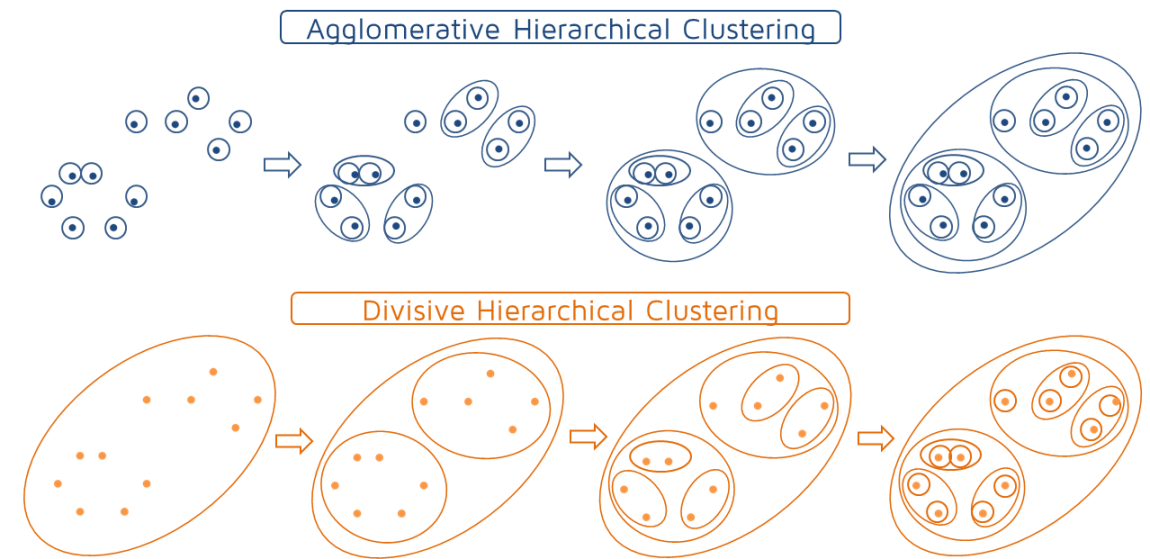

In [ ]:
hierarchical_clust = create_model('hclust')

In [ ]:
hierarchical_results = assign_model(hierarchical_clust)
hierarchical_results.head()

In [ ]:
plot_model(hierarchical_clust)

In [ ]:
plot_model(hierarchical_clust, plot = 'distribution') #to see size of clusters

## Commento: 

Il clustering gerarchico si è rivelato poco efficace su questo dataset. In particolare, si osserva che il cluster viola risulta significativamente più piccolo rispetto agli altri. Questo squilibrio è probabilmente dovuto all’alta densità dei dati, che porta molti dei punti assegnati al cluster viola a comportarsi come outlier o a posizionarsi ai margini rispetto alle strutture principali dei dati.

In [ ]:
plot_model(hierarchical_clust, plot ='tsne')

## Spectral Clustering

In questa parte del laboratorio, che abbiamo integrato personalmente, confronteremo il clustering gerarchico con il clustering spettrale al fine di analizzarne punti di forza e debolezze.

Ci aspettiamo che il clustering spettrale offra risultati più efficaci, soprattutto in presenza di strutture complesse o non lineari nei dati, dove i metodi tradizionali come il clustering gerarchico tendono a perdere efficacia. Attraverso questo confronto, miriamo a identificare quale approccio si adatti meglio alla distribuzione dei dati nel nostro dataset e a giustificare la scelta del modello più adatto per le analisi successive.

In [ ]:
sampled_data = imp_data.sample(frac=1 )

clu = setup(
    data=sampled_data,
    normalize=True,
    pca=True,
    remove_multicollinearity=True,
    session_id=123
)

sc = create_model('sc', num_clusters=4,affinity="nearest_neighbors")


In [ ]:
sc_results = assign_model(sc)
sc_results.head()


In [ ]:
plot_model(sc)


In [ ]:
plot_model(sc, plot = 'distribution') #to see size of clusters

In [ ]:
plot_model(sc, plot = 'tsne') #to see size of clusters